In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan

from src.clusterings_space import *
from src.multiparameter_clustering import *
from src.plotting import *

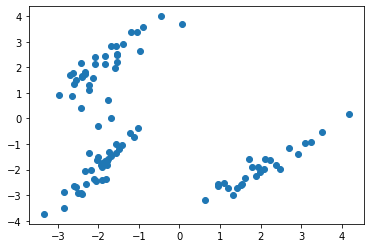

In [3]:
# import dataset and display it

data = pd.read_csv("./example-datasets/simple-dataset.csv", header=None)
test_data = np.asarray(data[[0,1]])

plt.scatter(test_data.T[0], test_data.T[1])
plt.show()

In [4]:
# run HDBSCAN with a range of parameters on the dataset
# this is the set S

range_min_cluster_sizes = [ m for m in range(2,20)]
range_min_samples = [ k for k in range(1,20) ]

range_min_cluster_sizes_min_samples = [(m,k) for m in range_min_cluster_sizes for k in range_min_samples]

clusterings = multiparameter_hdbscan_(test_data, range_min_cluster_sizes_min_samples)

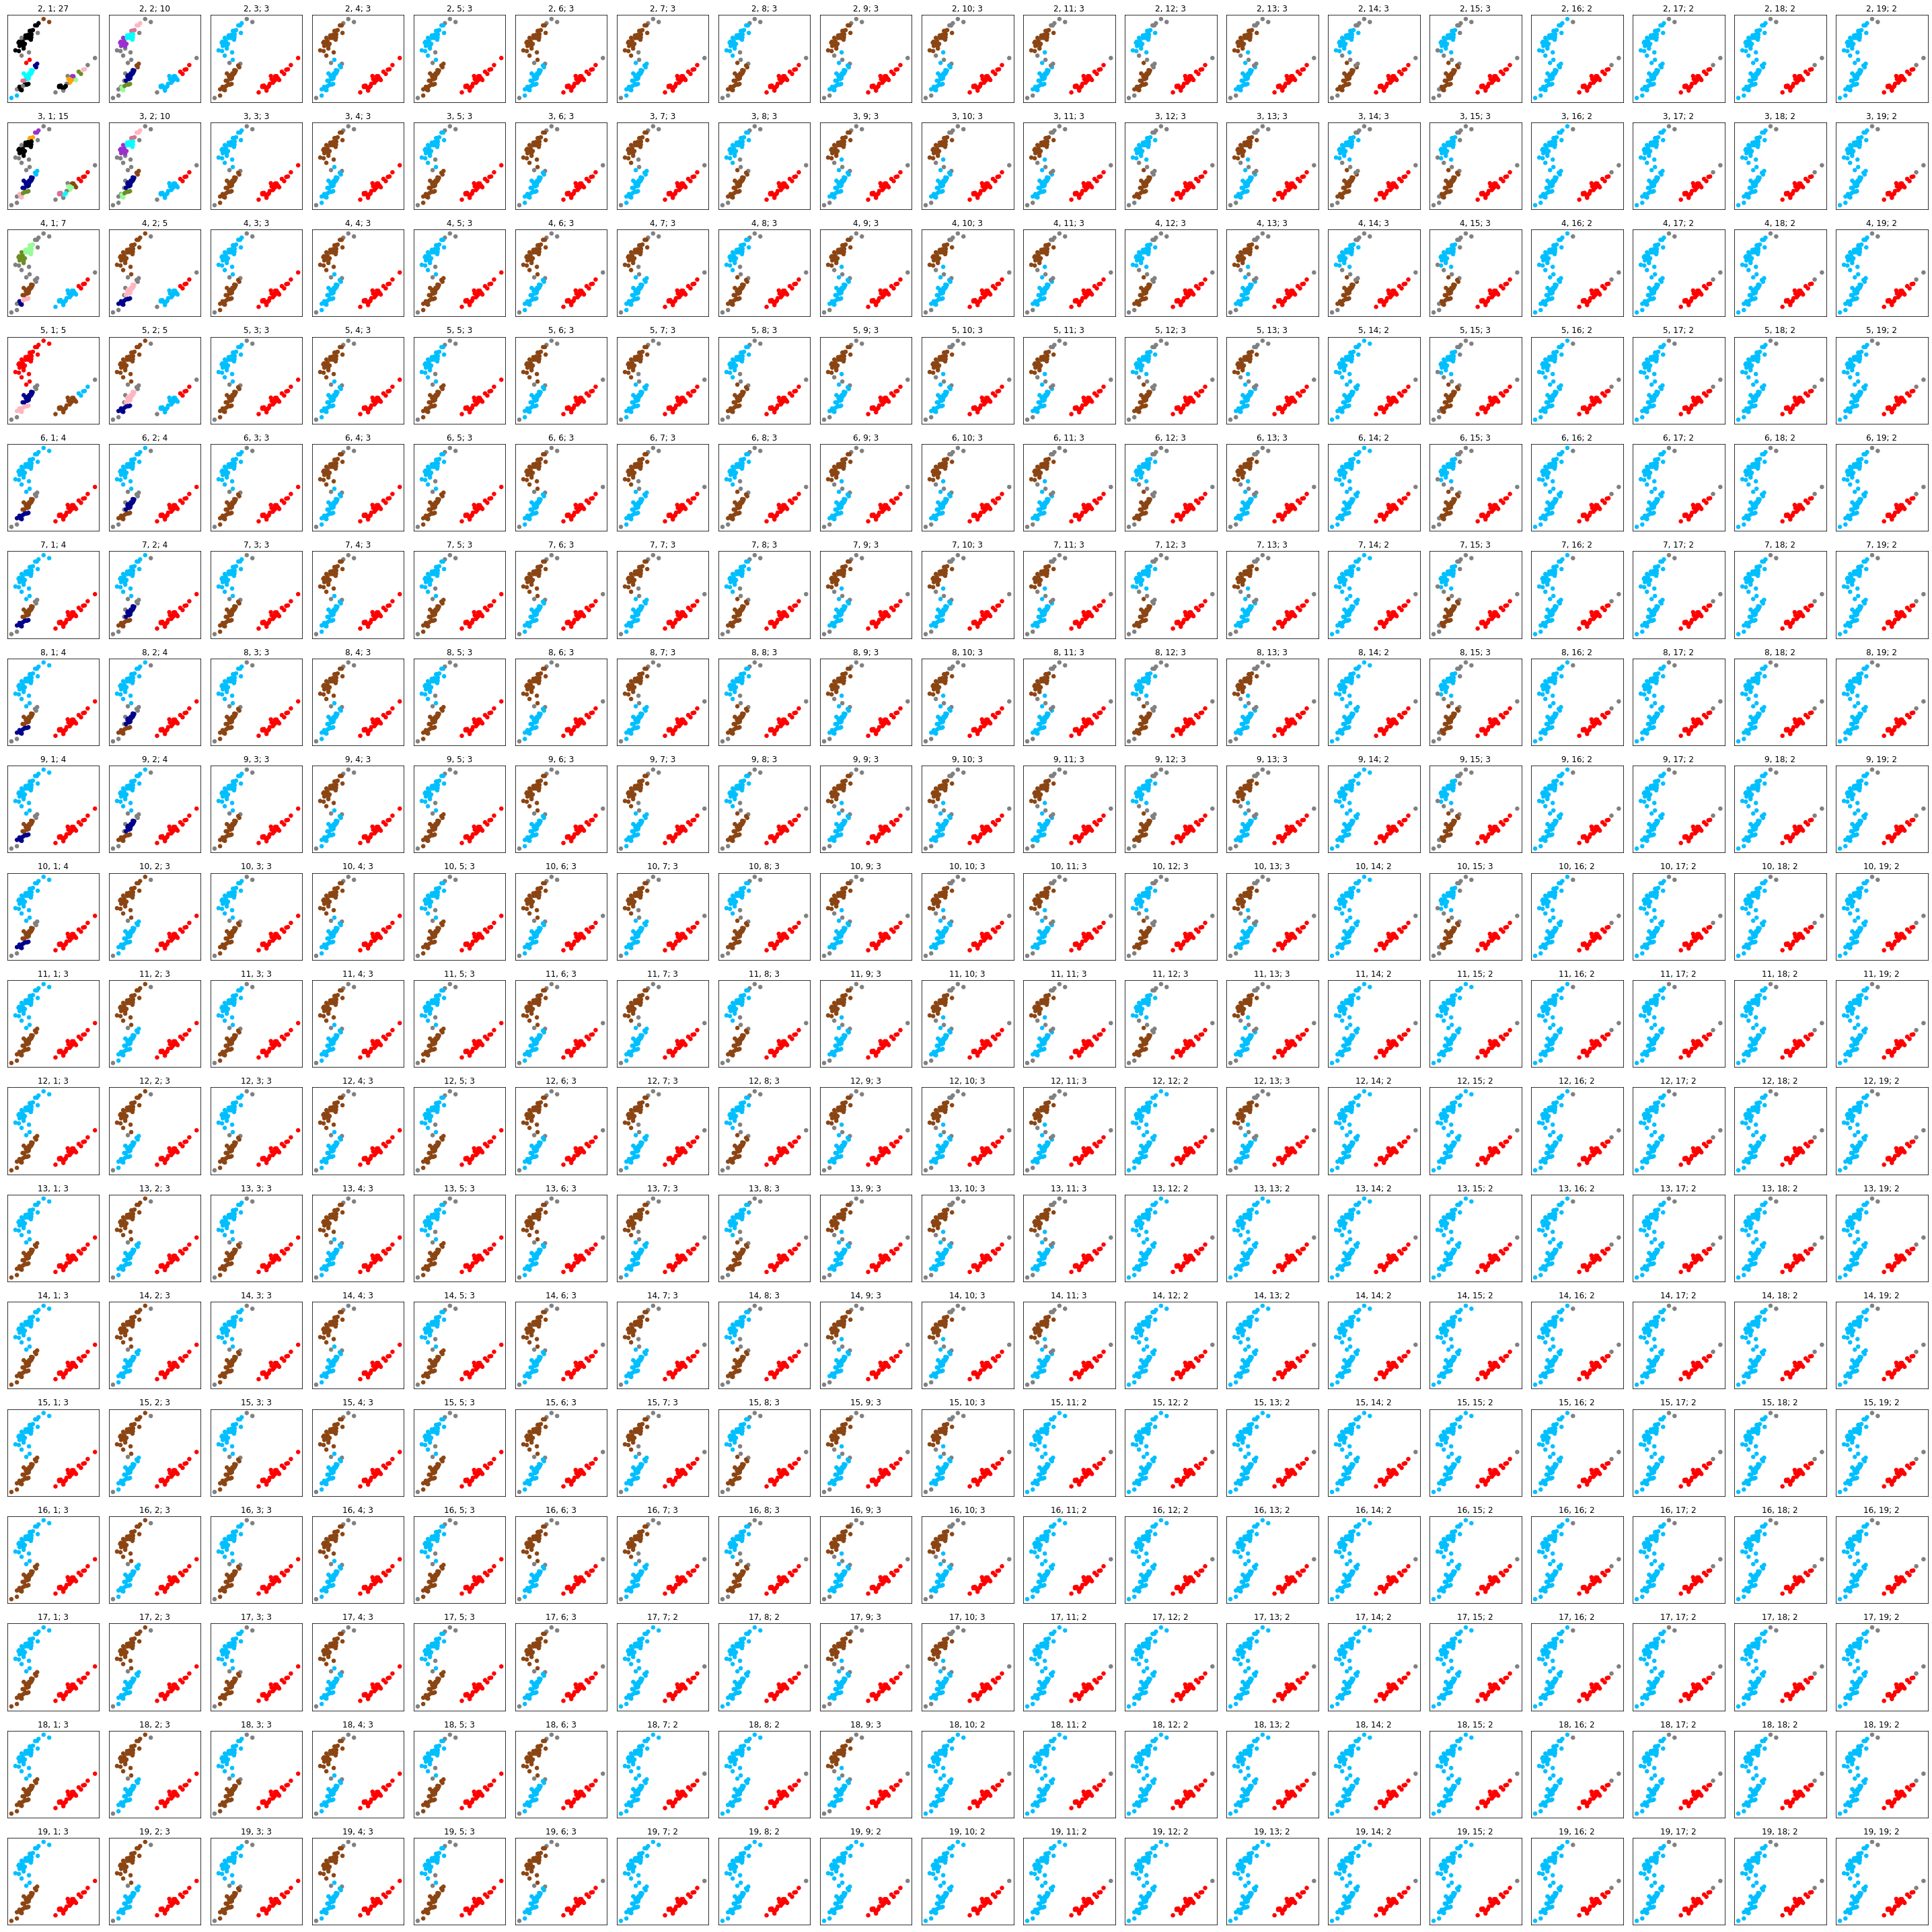

In [5]:
# display all the clusterings in a grid (this can be skipped, and it takes a while)

plot_clusterings_grid(test_data, clusterings, figsize=(40,40))

In [6]:
# construct M(S), by sampling 500 columns

cls_df = clusterings_as_df(clusterings, seed = 0, n_dim = 1000)

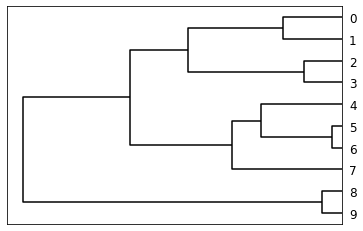

In [7]:
# Using HPREF to partition the set of clusterings. Start by choosing large max_l and visualizing the dendrogram

clustering_cl_space_hpref, keys, dendr = hpref(cls_df, max_l = 10)

plot_dendrogram(dendr)

In [8]:
# Looking at the dendrogram, max_l = 4 seems reasonable

clustering_cl_space_hpref, keys, dendr = hpref(cls_df, max_l = 4)

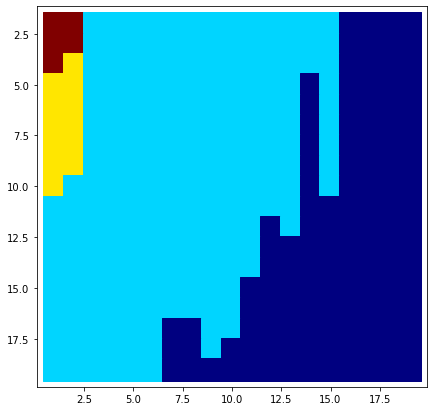

In [9]:
# Visualize the parameter space

plot_cl_space_grouping(keys, clustering_cl_space_hpref, rev=True, figsize=(7,7), dotsize=500)

In [ ]:
# Compare the partition with the clusterings in the grid above